Импорт и анализ данных

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel('Новый диплом датасет.xlsx', sheet_name='Данные')

In [4]:
df1.head(10)

,id_order,id_client,amt_payment,dtime_pay
0,162295,203943.0,2802.0,2022-10-17 20:38:22.304000
1,185621,206742.0,4404.0,2022-12-13 09:47:43.880000
2,267875,183601.0,5192.0,2022-09-07 11:14:52.440000
3,173557,203446.0,2438.0,2022-09-07 08:23:40.021000
4,239130,188188.0,2488.0,2022-09-06 00:16:37.306000
5,202161,196151.0,2900.0,2022-10-22 23:21:01.660000
6,219886,194212.0,2180.0,2022-11-14 19:50:35.959000
7,123132,206076.0,558.0,2022-10-28 02:00:33.837000
8,105244,202051.0,5512.0,2022-11-01 18:35:35.809000
9,167223,183669.0,3189.0,2022-07-14 15:00:14.202000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38691 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     38691 non-null  int64  
 1   id_client    38103 non-null  float64
 2   amt_payment  36536 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [12]:
#Исключите из таблиц все строки, в которых есть нулловые значения
df11 = df1[~((df1['id_client'].isnull()) | (df1['amt_payment'].isnull()) | (df1['dtime_pay'].isnull()))]

In [13]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36519 entries, 0 to 38690
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     36519 non-null  int64  
 1   id_client    36519 non-null  float64
 2   amt_payment  36519 non-null  float64
 3   dtime_pay    36519 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
df2 = pd.read_excel('Новый диплом датасет.xlsx', sheet_name='Clients')

In [7]:
df2.head(10)

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
5,254313,2022-06-19 22:18:01.770,1,453
6,195818,2022-07-16 01:30:59.088,1,2652
7,267165,2022-06-25 09:54:06.470,0,866
8,246645,2022-07-03 22:13:08.299,0,1099
9,274394,2022-06-25 00:46:07.492,1,2652


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB


In [16]:
#Исключите из таблиц все строки, в которых есть нулловые значения
df21 = df2[~((df2['dtime_ad'].isnull()))]

In [17]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


In [9]:
df3 = pd.read_excel('Новый диплом датасет.xlsx', sheet_name='Region_dict')

In [10]:
df3.head(10)

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
5,13,Нижний Новгород
6,19,Тюмень
7,23,Великий Новгород
8,26,Ростов-на-Дону
9,33,Самара


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [18]:
df3.isnull().any()

id_trading_point    False
city                False
dtype: bool

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Исследуйте количество торговых точек в каждом городе - постройте группировку по количеству в каждом городе и визуализируйте с помощью гистограммы
df4 = df3.groupby('city')['id_trading_point'].count().reset_index()

In [24]:
df4

,city,id_trading_point
0,Великий Новгород,1
1,Владимир,1
2,Волгоград,1
3,Дмитров,1
4,Казань,6
5,Краснодар,4
6,Красноярск,5
7,Москва,11
8,Мурманск,2
9,Нижний Новгород,1


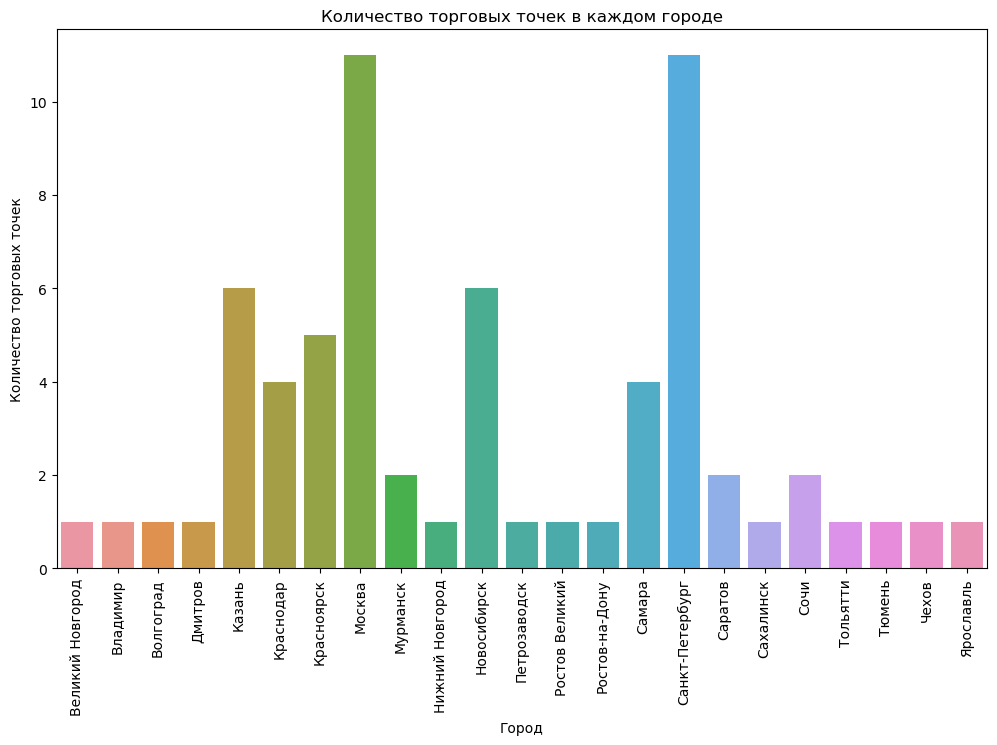

In [25]:
fig = plt.figure(figsize =(12, 7))
sns.barplot(x="city", y="id_trading_point", data = df4)
plt.xlabel('Город')
plt.xticks(x="city", rotation=90)
plt.tick_params (axis='x', which='minor', labelsize=5)
plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек в каждом городе')
plt.show()

Объединение таблиц

In [26]:
#Постройте агрегацию таблицы с платежами, где вычислите сумму платежей на каждого клиента
df5 = df11.groupby('id_client')['amt_payment'].sum().reset_index()

In [27]:
df5

,id_client,amt_payment
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178565.0,958.0
4,178566.0,5474.0
...,...,...
29014,209630.0,6927.0
29015,209631.0,2090.0
29016,209632.0,2775.0
29017,209633.0,1673.0


In [29]:
#Соедините (по клиенту) сгруппированную таблицу с платежами с клиентской таблицей
df52 =  pd.merge(df5, df21, 
         how='right',                      
         left_on='id_client', right_on='id_client')

In [30]:
df52

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212
1,226069.0,NaN,2022-07-11 16:28:38.511,1,54
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991
3,322530.0,NaN,2022-07-08 08:56:08.714,0,1015
4,254313.0,NaN,2022-06-19 22:18:01.770,1,453
...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015
55352,244069.0,NaN,2022-08-08 00:12:31.319,1,991
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573


In [38]:
#Заполните нулями суммы покупок тех клиентов, которые их не совершали
df52['amt_payment'] = df52['amt_payment'].fillna(0)

In [39]:
df52

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453
...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573


In [40]:
#подтяните к каждой торговой точке город, в котором она находится
df523 =  pd.merge(df52, df3, 
         on ='id_trading_point',
         how ='left')

In [41]:
df523

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point,city
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015,Краснодар
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург
...,...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015,Краснодар
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург


In [42]:
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, spearmanr, mannwhitneyu

In [43]:
#Создайте поле флаг платежа, который принимает значения 0 или 1 в зависимости от того, заплатил клиент или нет
df523['flag_payment'] = np.where(df523['amt_payment'] == 0, 0, 1)

In [44]:
df523

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point,city,flag_payment
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск,1
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск,0
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань,1
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015,Краснодар,0
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург,0
...,...,...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015,Краснодар,1
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань,0
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань,1
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург,1


Автоматизация статистических вычислений

In [45]:
def mann_whitney_func(r1, r2, alpha=.05):
    
    s, p = mannwhitneyu(r1, r2)
    
    if p < alpha:
        print('Распределения не равны')
    else:
        print('Распределения равны')
    
    print("P_value = ",p)
    return s, p

In [46]:
def test_calc(r1, r2, alpha = 0.05):
    
    s,p = ttest_ind(r1,r2)
    
    if p < alpha:
        print("Гипотеза H0 не подтверждается: средние не равны")
    else:
        print("Гипотеза H0 подтверждается: средние равны")
    
    print("Среднее значение 1 ряда", r1.mean())
    print("Среднее значение 2 ряда", r2.mean())
    print("Разница средних = ", r1.mean()-r2.mean())
    print("P_value = ",p)
    return s, p

Чистка неверно заполненных точек

In [47]:
#Создайте пустой список. Запустите цикл по всем торговым точкам и добавьте к этому списку все торговые точки, в которых не было заплачено ни одного рубля ни одним клиентом

In [51]:
null_point = []
for i in df523['id_trading_point'].unique():
    sum_a = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==0)].sum()['amt_payment'].sum()
    sum_b = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==1)].sum()['amt_payment'].sum()
    if (sum_a == 0) | (sum_b == 0):
        null_point.append(i)
        
print(null_point)


C:\Users\User\AppData\Local\Temp\ipykernel_5608\1780577917.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\User\AppData\Local\Temp\ipykernel_5608\1780577917.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\User\AppData\Local\Temp\ipykernel_5608\1780577917.py:3: FutureWarning: The default value of numeric_only in

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]


C:\Users\User\AppData\Local\Temp\ipykernel_5608\1780577917.py:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_a = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==0)].sum()['amt_payment'].sum()
C:\Users\User\AppData\Local\Temp\ipykernel_5608\1780577917.py:4: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sum_b = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==1)].sum()['amt_payment'].sum()
C:\Users\User\AppData\Local\Temp\ipykernel_5608\1780577917.py:3: FutureWarning: The default value of numeric_only in

In [52]:
null_point

[1015, 866, 1099, 739, 46, 228, 26, 603, 810, 800, 7, 23, 4, 1, 13]

In [50]:
#Создайте еще один пустой список. Запустите цикл по всем торговым точкам и добавьте к этому списку все торговые точки, в которых пустует или контрольная, или тестовая группа.

In [53]:
empty_group_points = []

for i in df523['id_trading_point'].unique():
    c_a = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==0)].count()['id_client']
    c_b = df523[(df523['id_trading_point']==i) & (df523['nflag_test']==1)].count()['id_client']
    if (c_a == 0) | (c_b == 0):
        empty_group_points.append(i)
        
print(empty_group_points)

[1015, 866, 1099, 739, 228, 603, 810, 800]


Расчет общих результатов АБ Теста

In [54]:
# Отбросьте все торговые точки, которые были вами обнаружены в предыдущем пункте

In [55]:
df6 = df523[~df523['id_trading_point'].isin(empty_group_points + null_point)]

In [56]:
df6

,id_client,amt_payment,dtime_ad,nflag_test,id_trading_point,city,flag_payment
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск,1
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск,0
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань,1
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург,0
5,195818.0,4021.0,2022-07-16 01:30:59.088,1,2652,Москва,1
...,...,...,...,...,...,...,...
55350,188702.0,1323.0,2022-06-28 06:16:25.664,0,453,Санкт-Петербург,1
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань,0
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань,1
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург,1


In [57]:
#Изобразите гистограмму платежей, на которой различными цветами изображены группы “тест” и “контроль”

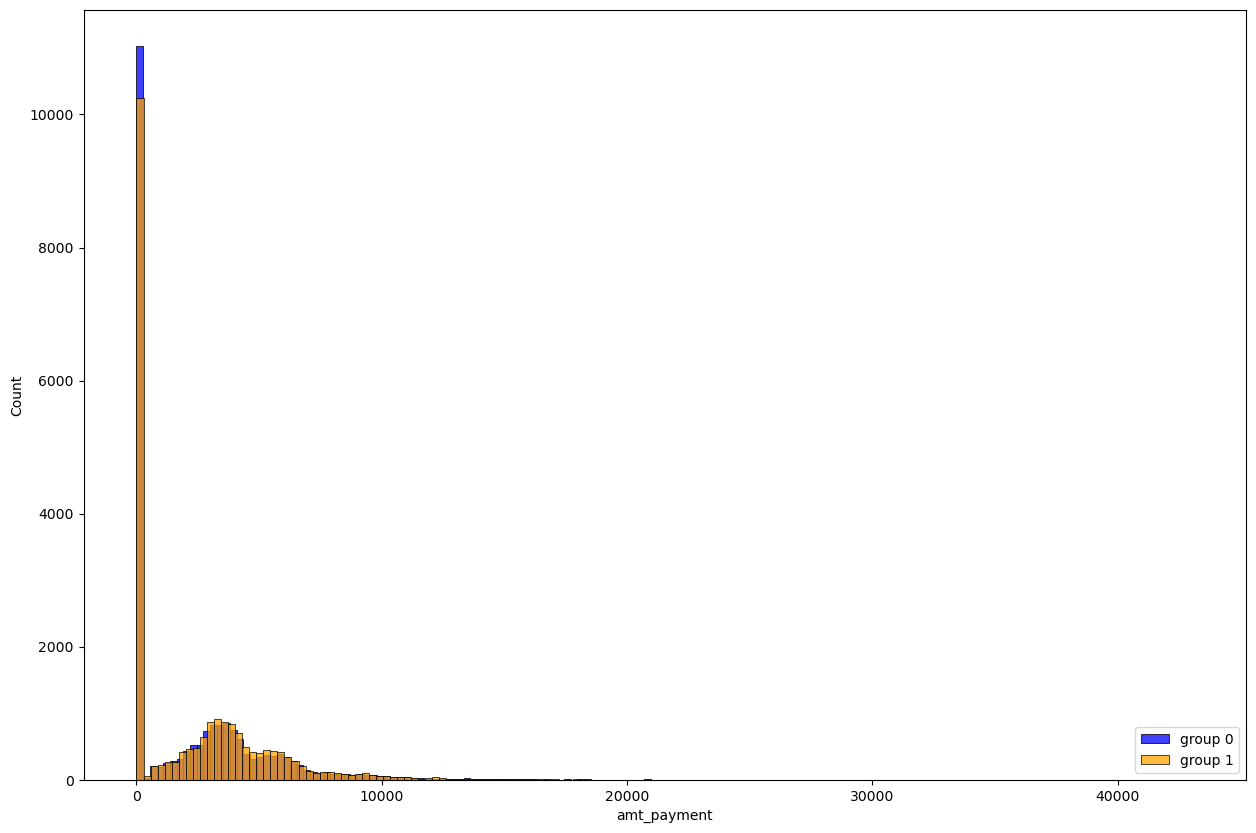

In [60]:
fig = plt.figure(figsize =(15, 10))
sns.histplot(df6[df6['nflag_test']== 0]['amt_payment'], color='blue', label = 'group 0')
sns.histplot(df6[df6['nflag_test']== 1]['amt_payment'], color='orange', label = 'group 1')
plt.legend(loc = 'lower right')
plt.show()

In [62]:
#Примените функцию test_calc и сделайте вывод (сравниваем средние платежи)
s_t, p_t = test_calc(df6[df6['nflag_test']== 1]['amt_payment'],df6[df6['nflag_test']== 0]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2452.2773446201827
Среднее значение 2 ряда 2293.36610851222
Разница средних =  158.91123610796285
P_value =  1.488511135509387e-08


In [63]:
#Примените функцию test_calc и сделайте вывод (сравниваем конверсию в платеж, то есть r1 и r2 - это ряды нулей и единиц, в зависимости от того, оплатил ли что-то клиент или нет)
s_t, p_t = test_calc(df6[df6['nflag_test']== 1]['flag_payment'],df6[df6['nflag_test']== 0]['flag_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.5432835820895522
Среднее значение 2 ряда 0.5180780833296901
Разница средних =  0.02520549875986211
P_value =  7.604318948190198e-08


In [64]:
#Примените функцию mann_whitney_func и сделайте вывод
s_mw, p_mw = mann_whitney_func(df6[df6['nflag_test']== 1]['amt_payment'],df6[df6['nflag_test']== 0]['amt_payment'])

Распределения не равны
P_value =  1.246458969497137e-09


Сегментация результатов АБ Теста

In [65]:
#Москва

In [68]:
df6_moscow = df6[df6['city'] == 'Москва']

In [85]:
s_tmoscow1, p_tmoscow1 = test_calc(df6_moscow[df6_moscow['nflag_test']== 1]['amt_payment'],df6_moscow[df6_moscow['nflag_test']== 0]['amt_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 1986.18059125964
Среднее значение 2 ряда 2367.9590805347243
Разница средних =  -381.7784892750842
P_value =  1.757549439555765e-14


In [86]:
s_tmoscow2, p_tmoscow2 = test_calc(df6_moscow[df6_moscow['nflag_test']== 1]['flag_payment'],df6_moscow[df6_moscow['nflag_test']== 0]['flag_payment'])

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 0.4879498714652956
Среднее значение 2 ряда 0.5435278774046299
Разница средних =  -0.05557800593933432
P_value =  6.194689260032594e-10


In [81]:
s_mwmoscow, p_mwmoscow = mann_whitney_func(df6_moscow[df6_moscow['nflag_test']== 1]['amt_payment'],df6_moscow[df6_moscow['nflag_test']== 0]['amt_payment'])

Распределения не равны
P_value =  7.010591402203484e-16


In [71]:
#Санкт-Петербург

In [72]:
df6_spb = df6[df6['city'] == 'Санкт-Петербург']

In [82]:
s_tspb1, p_tspb1 = test_calc(df6_spb[df6_spb['nflag_test']== 1]['amt_payment'],df6_spb[df6_spb['nflag_test']== 0]['amt_payment'])

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2427.462542182227
Среднее значение 2 ряда 2450.964140730717
Разница средних =  -23.501598548490165
P_value =  0.7030554040209538


In [83]:
s_tspb2, p_tspb2 = test_calc(df6_spb[df6_spb['nflag_test']== 1]['flag_payment'],df6_spb[df6_spb['nflag_test']== 0]['flag_payment'])

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5471316085489314
Среднее значение 2 ряда 0.542850699142986
Разница средних =  0.004280909405945388
P_value =  0.6854986692744592


In [84]:
s_mwspb, p_mwspb = mann_whitney_func(df6_spb[df6_spb['nflag_test']== 1]['amt_payment'],df6_spb[df6_spb['nflag_test']== 0]['amt_payment'])

Распределения равны
P_value =  0.8955099861717897


In [75]:
#Другие города

In [92]:
df6_cities = list(df6['city'].unique())
df6_cities

['Красноярск',
 'Мурманск',
 'Казань',
 'Санкт-Петербург',
 'Москва',
 'Саратов',
 'Тольятти',
 'Тюмень',
 'Волгоград',
 'Сочи',
 'Владимир',
 'Самара',
 'Краснодар',
 'Сахалинск',
 'Дмитров']

In [78]:
cities = list(df3['city'].unique())
cities

['Петрозаводск',
 'Дмитров',
 'Чехов',
 'Ростов Великий',
 'Владимир',
 'Нижний Новгород',
 'Тюмень',
 'Великий Новгород',
 'Ростов-на-Дону',
 'Самара',
 'Ярославль',
 'Мурманск',
 'Волгоград',
 'Сахалинск',
 'Сочи',
 'Саратов',
 'Тольятти',
 'Санкт-Петербург',
 'Красноярск',
 'Новосибирск',
 'Казань',
 'Москва',
 'Краснодар']

In [93]:
for i in df6_cities:
    print(i)
    print()
    df_city = df6[df6['city'] == i]
    print("Результаты для таргет-метрики Средний чек:")
    print()
    test_calc(df_city[df_city['nflag_test']== 1]['amt_payment'],df_city[df_city['nflag_test']== 0]['amt_payment'])
    print()
    print("Результаты для таргет-метрики Конверсия из рекламы в покупку:")
    print()
    test_calc(df_city[df_city['nflag_test']== 1]['flag_payment'],df_city[df_city['nflag_test']== 0]['flag_payment'])
    print()

Красноярск

Результаты для таргет-метрики Средний чек:

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2437.4958840961476
Среднее значение 2 ряда 2428.7775862068966
Разница средних =  8.718297889251062
P_value =  0.9044823881233125

Результаты для таргет-метрики Конверсия из рекламы в покупку:

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.5577872900889035
Среднее значение 2 ряда 0.5613793103448276
Разница средних =  -0.003592020255924089
P_value =  0.7805336501430107

Мурманск

Результаты для таргет-метрики Средний чек:

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1865.2710900473933
Среднее значение 2 ряда 1857.2197183098592
Разница средних =  8.051371737534055
P_value =  0.9449762446327565

Результаты для таргет-метрики Конверсия из рекламы в покупку:

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 0.4369668246445498
Среднее значение 2 ряда 0.4187793427230047
Разница средних =  0.018187481921545068
P_va

Отчет по АБ Тесту

In [102]:
df_res = pd.DataFrame()

for i in df6_cities:
    df_loc = df6[df6['city'] == i]
    
    for j in df_loc['id_trading_point'].unique():
            df_loc_j = df_loc[df_loc['id_trading_point'] == j]
            count_test = len(df_loc_j[df_loc_j['nflag_test'] == 1]) #кол-во наблюдений в тестовой группе
            count_control = len(df_loc_j[df_loc_j['nflag_test'] == 0]) #кол-во наблюдений в контрольной группе
            count_all = count_test + count_control #суммарное кол-во наблюдений
            avg_payment_test = np.mean(df_loc_j[df_loc_j['nflag_test'] == 1]['amt_payment']) #средний платеж в тестовой группе
            avg_payment_control = np.mean(df_loc_j[df_loc_j['nflag_test'] == 0]['amt_payment']) #средний платеж в контрольной группе
            diff = avg_payment_test - avg_payment_control #разница между средними платежами
            sigma_test = df_loc_j[df_loc_j['nflag_test'] == 1]['amt_payment'].std() #стандартное отклонение платежей в тестовой группе
            sigma_control = df_loc_j[df_loc_j['nflag_test'] == 0]['amt_payment'].std() #стандартное отклонение платежей в контрольной группе
            s_a,p_a = test_calc(df_loc_j[df_loc_j['nflag_test']== 1]['amt_payment'],df_loc_j[df_loc_j['nflag_test']== 0]['amt_payment'])
           
            df_res = df_res.append({ 'city':i
                                    , 'id_traiding_point':j
                                    , 'count_test':count_test
                                    , 'count_control':count_control
                                    , 'count_all':count_all
                                    , 'avg_payment_test':avg_payment_test
                                    , 'avg_payment_control':avg_payment_control
                                    , 'diff':diff
                                    , 'sigma_test':sigma_test
                                    , 'sigma_control':sigma_control
                                    ,'ttest':s_a
                                    , 'pvalue_ttest':p_a
                                   }, ignore_index = True)



Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2144.317032040472
Среднее значение 2 ряда 2222.0521739130436
Разница средних =  -77.7351418725716
P_value =  0.6287709476405416
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2499.345794392523
Среднее значение 2 ряда 2185.2147239263804
Разница средних =  314.1310704661428
P_value =  0.06901056074583502
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2927.3411978221416
Среднее значение 2 ряда 2730.378761061947
Разница средних =  196.96243676019458
P_value =  0.24830826390447136
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2404.106153846154
Среднее значение 2 ряда 2545.73487544484
Разница средних =  -141.62872159868584
P_value =  0.3808017001028424
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 2285.75
Среднее значение 2 ряда 2431.3653032440056
Разница средних =  -145.61530324400564
P_value =  0.3264127897793312
Гипотеза H0 подтверждается: средние

C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.p

Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2506.616805983282
Среднее значение 2 ряда 1972.8476793248944
Разница средних =  533.7691266583877
P_value =  2.005922423225886e-11
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1702.439577039275
Среднее значение 2 ряда 1528.3251088534107
Разница средних =  174.11446818586433
P_value =  0.18197815948321544
Гипотеза H0 не подтверждается: средние не равны
Среднее значение 1 ряда 2128.556756756757
Среднее значение 2 ряда 1394.6554621848738
Разница средних =  733.901294571883
P_value =  3.876566044301065e-05
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1602.9950062421972
Среднее значение 2 ряда 1639.8573248407642
Разница средних =  -36.86231859856707
P_value =  0.7780070273603263
Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 1859.777027027027
Среднее значение 2 ряда 1804.25
Разница средних =  55.52702702702709
P_value =  0.8663043555057068
Гипотеза H0 подтверж

C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i
C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.p

Гипотеза H0 подтверждается: средние равны
Среднее значение 1 ряда 579.3333333333334
Среднее значение 2 ряда 483.4507042253521
Разница средних =  95.88262910798124
P_value =  0.7410763125801646


C:\Users\User\AppData\Local\Temp\ipykernel_5608\2579534092.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append({ 'city':i


In [103]:
df_res

,city,id_traiding_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest
0,Красноярск,212,593,575,1168,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01
1,Красноярск,278,535,489,1024,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02
2,Красноярск,202,551,565,1116,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01
3,Красноярск,444,650,562,1212,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01
4,Красноярск,277,708,709,1417,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01
5,Мурманск,54,633,640,1273,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01
6,Мурманск,55,422,425,847,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01
7,Казань,991,270,294,564,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02
8,Казань,699,482,494,976,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01
9,Казань,477,382,386,768,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01


In [105]:
df_res['percent_count'] = (df_res['count_all'] / df_res['count_all'].sum())

In [106]:
df_res

,city,id_traiding_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count
0,Красноярск,212,593,575,1168,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01,0.025773
1,Красноярск,278,535,489,1024,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02,0.022596
2,Красноярск,202,551,565,1116,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01,0.024626
3,Красноярск,444,650,562,1212,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01,0.026744
4,Красноярск,277,708,709,1417,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01,0.031268
5,Мурманск,54,633,640,1273,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01,0.028090
6,Мурманск,55,422,425,847,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01,0.018690
7,Казань,991,270,294,564,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,0.012445
8,Казань,699,482,494,976,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01,0.021537
9,Казань,477,382,386,768,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01,0.016947


In [107]:
#В таблице также должен присутствовать флаг (лейбл), по которому можно будет разделить торговые точки по результатам эксперимента: Положительный исход, Отрицательный исход, Нейтральный исход

In [111]:
df_res['flag_diff'] = np.where((df_res['pvalue_ttest'] < 0.05) & (df_res['diff'] > 0), 'Положительный исход'
                               , np.where((df_res['pvalue_ttest'] < 0.05) & (df_res['diff'] < 0), 'Отрицательный исход', 'Нейтральный исход'))

In [112]:
df_res

,city,id_traiding_point,count_test,count_control,count_all,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count,flag_diff
0,Красноярск,212,593,575,1168,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01,0.025773,Нейтральный исход
1,Красноярск,278,535,489,1024,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02,0.022596,Нейтральный исход
2,Красноярск,202,551,565,1116,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01,0.024626,Нейтральный исход
3,Красноярск,444,650,562,1212,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01,0.026744,Нейтральный исход
4,Красноярск,277,708,709,1417,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01,0.031268,Нейтральный исход
5,Мурманск,54,633,640,1273,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01,0.028090,Нейтральный исход
6,Мурманск,55,422,425,847,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01,0.018690,Нейтральный исход
7,Казань,991,270,294,564,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,0.012445,Положительный исход
8,Казань,699,482,494,976,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01,0.021537,Нейтральный исход
9,Казань,477,382,386,768,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01,0.016947,Нейтральный исход


In [118]:
writer = pd.ExcelWriter("Калькулятор торговых точек SkyLenta.xlsx")

df_res[df_res['flag_diff'] == 'Положительный исход'].to_excel(writer, sheet_name = "Успешные ТТ", index = False)
df_res[df_res['flag_diff'] == 'Отрицательный исход'].to_excel(writer, sheet_name = "Неуспешные ТТ", index = False)
df_res[df_res['flag_diff'] == 'Нейтральный исход'].to_excel(writer, sheet_name = "Нейтральные ТТ", index = False)

writer.close()